## Data Cleaning & Exploration Activity

## 1. Data Cleaning

Poor data quality can have an adverse effect on data mining. Some common data quality issues include missing values, incorrectly formatted data, noise, outliers, and duplicate data. There could be many other data quality issues as well. Here, we will experiment with detecting and alleviating some of these data quality problems. 

### 1.1 Cleaning the CSV file
For this particular dataset, because it is quite small, some of the data cleaning can be done "by hand" in the csv file.

Open the csv file and take a look at it. Manually clean up some of the data. Things to consider:
* Make sure all of the numeric columns contain only numbers. Check the 'Age', 'Miles from Austin', 'Number of shoes', and 'How much cash' columns. Make sure they are all in the same units. 

* Replace any missing or unknown values with a '?'.

* Save your cleaned data file as a .csv (this makes things easier than an .xlsx file).


### 1.2 Reading data from a CSV file
Read the cleaned csv file into a Pandas dataframe. Print out the shape of the dataframe and the head of the dataframe.

You can find more on reading csv data in to a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).
Documentation for Pandas DataFrames is [here](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# your code goes here
data = pd.read_csv('329E_Spring2020_Data-1.csv')
data

,How old are you?,What year are you in school?,What is your major?,What is your hometown?,How many miles is your hometown from Austin?,How tall are you in inches?,What is your favorite color?,How many pairs of shoes do you own?,How many MINUTES did you spend exercising yesterday?,How many MINUTES did you spend on the computer yesterday?,How many HOURS did you sleep last night?,How many siblings do you have?,How much cash do you have on you right now?,Did you eat breakfast this morning?
0,22,Senior,Fine Arts / Architecture,"Austin, Texas",0,72.0,Sapphire blue,5,0,480,7.50,2,21.0,Not yet
1,22,Senior,Natural Sciences (& Math) / Geosciences,"Houston, TX",165.2,69.0,Blue,5,10,300,10.00,1,15.0,yes!
2,21,Senior,Liberal Arts,Houston,165,68.0,Red,15,45,120,360.00,2,120.0,No
3,21,Senior,Natural Sciences (& Math) / Geosciences,"Houston, TX",180,68.0,Blue (#0066ff or around there),6,30,60,6.00,0,40.0,yes
4,20,Junior,Business,"Plano, TX",215,61.0,green,4,0,30,7.00,2,340.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,20,Junior,Natural Sciences (& Math) / Geosciences,Rio Grande City,312,67.0,Scarlet,9,65,100,8.25,2,0.0,Yes
108,20,Senior,Engineering,Houston,?,69.0,Blue,5,0,180,7.00,2,15.0,Yes. I always eat breakfast. I will take my br...
109,20,Junior,Business,California,1593,72.0,blue,8,30,60,480.00,1,0.0,yes
110,20,Junior,Natural Sciences (& Math) / Geosciences,"Austin, TX",0,68.0,Red,6,60,300,8.00,1,0.0,No


### 1.3 Missing Values

The missing values should now be encoded as '?'. 

* First, convert the missing values to NaNs. 
* Then, display the number of missing values in each column of the data.

In [11]:
# your code goes here
data = data.replace('?', np.nan)
for col in data:
    na_count = list(data[col]).count(np.nan)
    print(f'There are {na_count} missing values in column {col}.')

There are 1 missing values in column How old are you?.
There are 0 missing values in column What year are you in school?.
There are 0 missing values in column What is your major?.
There are 0 missing values in column What is your hometown?.
There are 4 missing values in column How many miles is your hometown from Austin?.
There are 0 missing values in column How tall are you in inches?.
There are 0 missing values in column What is your favorite color?.
There are 4 missing values in column How many pairs of shoes do you own?.
There are 0 missing values in column How many MINUTES did you spend exercising yesterday?.
There are 1 missing values in column How many MINUTES did you spend on the computer yesterday?.
There are 0 missing values in column How many HOURS did you sleep last night?.
There are 0 missing values in column How many siblings do you have?.
There are 0 missing values in column How much cash do you have on you right now?.
There are 0 missing values in column Did you eat bre

### 1.4 Imputation

One option for handling missing values is to fill them in with a "reasonable" estimation. This is called **imputation**. Mean or median values could be used for imputation of numeric attributes. Mode could be used for categorical imputation. Or mabye there is another value that makes sense for the data, like 0. 

Replace any missing values in the age column with something reasonable.

You will need to convert the data from strings to numeric values first. This line of code is provided for you.

In [24]:
# convert the column into numeric values first
data['How many pairs of shoes do you own?'] = pd.to_numeric(data['How many pairs of shoes do you own?'])

# your code goes here
median = data['How many pairs of shoes do you own?'].median()
data['How many pairs of shoes do you own?'].fillna(median, inplace=True)

## 2. Exploratory Data Analysis (EDA)
An important first step to every data analysis project is to explore your data. You need to have a good understanding of what is in your data. What are the ranges & distributions of the values, do you have any extreme values, are there any correlations between any of the features, etc. You just want to know and understand what you are working with.

### 2.1 Univariate Analysis: Explore the age feature
* Display some measures of central tendency for age
* Display some measures of dispersion for age
* Show a distribution of this feature with either a plot or a table.
* Are there any outliers? Show this with a plot.

unique ages: [20. 21. 22. 23. 24. nan]
median age: 21.0
mode age: 0    21.0
dtype: float64
              age
count  111.000000
mean    21.369369
std      0.923707
min     20.000000
25%     21.000000
50%     21.000000
75%     22.000000
max     24.000000
The boxplot function calculates the datum of 24 years old to be an outlier.


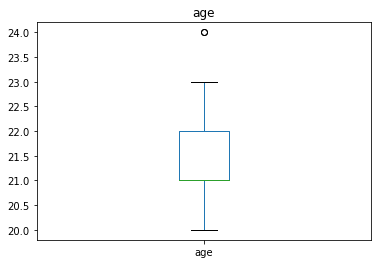

In [62]:
# convert the column into numeric values first
data['How old are you?'] = pd.to_numeric(data['How old are you?'])

# your code goes here
age = pd.DataFrame(data=data['How old are you?'], index=data.index)
age = age.rename(columns={'How old are you?':'age'})
age_col = age['age'].sort_values()
print(f'unique ages: {age_col.unique()}')
print(f'median age: {age_col.median()}')
print(f'mode age: {age_col.mode()}')
print(age.describe())
age_col.plot(kind='box', title='age')
print('The boxplot function calculates the datum of 24 years old to be an outlier.')

### 2.2 Bivariate Analysis: Correlate two features
I suspect there may be a negative correlation between time spent on the computer and time spent exercising (the more time you spend on the computer, the less time you spend excercising). Let's examine the data to see if this is the case...

Create a plot of computer time vs exercise time to see if you can visually see a correlation. Does there appear to be a correlation? Do there appear to be any bivariate outliers?

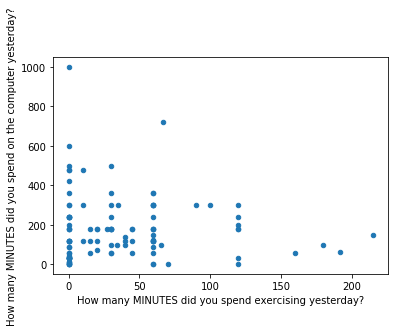

In [64]:
# your code goes here
data['How many MINUTES did you spend exercising yesterday?'] = pd.to_numeric(data['How many MINUTES did you spend exercising yesterday?'])
data['How many MINUTES did you spend on the computer yesterday?'] = pd.to_numeric(data['How many MINUTES did you spend on the computer yesterday?'])
data.plot.scatter(x='How many MINUTES did you spend exercising yesterday?',
                 y='How many MINUTES did you spend on the computer yesterday?')

### 2.3 Keep Exploring...
Continue to explore the data. See if you can find anything interesting!

In [ ]:
# your code goes here